In [2]:
%config IPCompleter.greedy=True
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [3]:
dataset_dir = "../dataset/100 leaves plant species/data"
labels = os.listdir(dataset_dir)

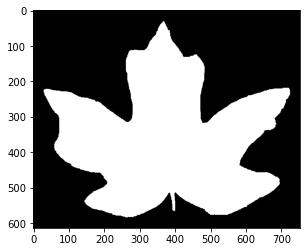

In [4]:
for label in labels:
    path = os.path.join(dataset_dir, label)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

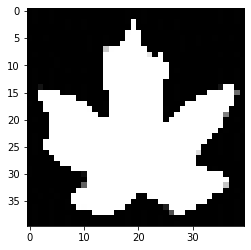

In [5]:
IMG_SIZE = 40
new_img_arr = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
type(new_img_arr)
plt.imshow(new_img_arr, cmap="gray")
plt.show()

In [6]:
training_data = []
testing_data = []
for label in labels:
    path = os.path.join(dataset_dir, label)
    label_index = labels.index(label)
    count = 0
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_img_arr = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
            if count < 12:
                training_data.append([new_img_arr, label_index])
            else:
                testing_data.append([new_img_arr, label_index])
            count += 1
        except Exception as e:
            print(e)

In [7]:
import random as rd
rd.shuffle(training_data)
rd.shuffle(testing_data)
train_X = []
train_Y = []
test_X = []
test_Y = []
for data, index in training_data:
    train_X.append(data)
    train_Y.append(index)

for data, index in testing_data:
    test_X.append(data)
    test_Y.append(index)


train_X  = np.array(train_X)
train_X = train_X.reshape((1200, 40,40,1))
train_Y = np.array(train_Y)

test_X  = np.array(test_X)
test_X = test_X.reshape((400, 40,40,1))
test_Y = np.array(test_Y)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [9]:
model = Sequential()
train_X = train_X.reshape((1200, 40,40,1))
model.add(Conv2D(64 ,(3,3), activation="relu",input_shape=(40,40,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),  activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1000, activation="relu"))

model.add(Dense(100,  activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
             optimizer="rmsprop",
            metrics=["accuracy"]
             )
model.fit(train_X,train_Y, batch_size=25, epochs=100 )

Train on 1200 samples
Epoch 1/100
1200/1200 [==============================] - 5s 4ms/sample - loss: 11.6091 - accuracy: 0.0792
Epoch 2/100
1200/1200 [==============================] - 5s 4ms/sample - loss: 2.9164 - accuracy: 0.3242
Epoch 3/100
1200/1200 [==============================] - 5s 4ms/sample - loss: 2.1027 - accuracy: 0.4625
Epoch 4/100
1200/1200 [==============================] - 5s 4ms/sample - loss: 1.5758 - accuracy: 0.5817
Epoch 5/100
1200/1200 [==============================] - 5s 4ms/sample - loss: 1.2809 - accuracy: 0.6583
Epoch 6/100
1200/1200 [==============================] - 5s 4ms/sample - loss: 1.0540 - accuracy: 0.7033
Epoch 7/100
1200/1200 [==============================] - 5s 4ms/sample - loss: 0.8721 - accuracy: 0.7517
Epoch 8/100
1200/1200 [==============================] - 5s 4ms/sample - loss: 0.7432 - accuracy: 0.7733
Epoch 9/100
1200/1200 [==============================] - 5s 4ms/sample - loss: 0.6466 - accuracy: 0.8150
Epoch 10/100
1200/1200 [========

1200/1200 [==============================] - 5s 4ms/sample - loss: 0.0783 - accuracy: 0.9817
Epoch 79/100
1200/1200 [==============================] - 5s 4ms/sample - loss: 0.0589 - accuracy: 0.9900
Epoch 80/100
1200/1200 [==============================] - 5s 4ms/sample - loss: 0.0759 - accuracy: 0.9850
Epoch 81/100
1200/1200 [==============================] - 5s 4ms/sample - loss: 0.0336 - accuracy: 0.9900
Epoch 82/100
1200/1200 [==============================] - 5s 4ms/sample - loss: 0.0821 - accuracy: 0.9842
Epoch 83/100
1200/1200 [==============================] - 5s 4ms/sample - loss: 0.1509 - accuracy: 0.9833
Epoch 84/100
1200/1200 [==============================] - 5s 4ms/sample - loss: 0.0252 - accuracy: 0.9933
Epoch 85/100
1200/1200 [==============================] - 5s 4ms/sample - loss: 0.1163 - accuracy: 0.9842
Epoch 86/100
1200/1200 [==============================] - 5s 4ms/sample - loss: 0.1345 - accuracy: 0.9800
Epoch 87/100
1200/1200 [==============================] - 5

In [14]:
prob = model.predict(test_X[0:400])
predicted = []
actual_res = []
for it in prob:
    arr = it.tolist()
#     print(max(arr))
    label = labels[arr.index(max(arr))]
    predicted.append(label)
    
for i in range(390,400):
    actual_res.append(labels[test_Y[i]])
print(predicted)
print(actual_res)

['Quercus_Canariensis', 'Alnus_Cordata', 'Quercus_Suber', 'Cotinus_Coggygria', 'Acer_Rubrum', 'Ginkgo_Biloba', 'Zelkova_Serrata', 'Quercus_Canariensis', 'Populus_Adenopoda', 'Cornus_Macrophylla']
['Quercus_Cerris', 'Alnus_Cordata', 'Olea_Europaea', 'Cotinus_Coggygria', 'Acer_Rubrum', 'Ginkgo_Biloba', 'Acer_Capillipes', 'Quercus_Pontica', 'Populus_Adenopoda', 'Cornus_Macrophylla']
